# 作業

- 作業目標 : iris (dataset.load_iris()) 資料嘗試跑 kmeans (可以測試不同的群數 , init 等)

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

iris = datasets.load_iris()
X = iris.data
y = iris.target

C:\Users\User\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\User\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\User\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


### 載入 相關套件 並 執行 kmean 實驗 ...

- 實驗測試不同的群數
- 實驗測試不同的初始值
- 呈現結果

In [2]:
X.dtype
X.shape
y.dtype
# y.shape

dtype('int32')

In [3]:
estimators = [('k_means_6', KMeans(n_clusters=6)),
             ('k_means_3', KMeans(n_clusters=3)),
             ('k_means_init_1', KMeans(n_clusters=3, n_init=1,
                                        init='random')),
             ('k_means_init_2', KMeans(n_clusters=3, n_init=2,
                                        init='random')),
             ('k_means_init_3', KMeans(n_clusters=3, n_init=3,
                                        init='random')),
             ('k_means_init_4', KMeans(n_clusters=3, n_init=4,
                                        init='random'))]

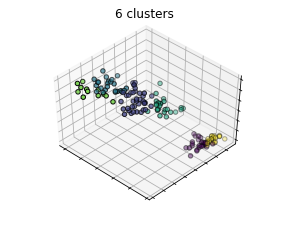

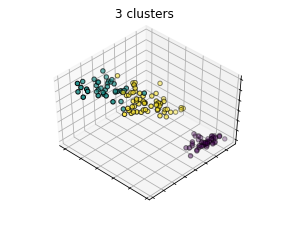

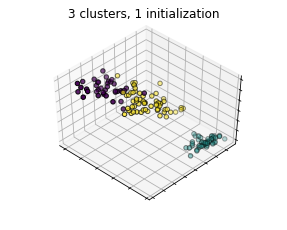

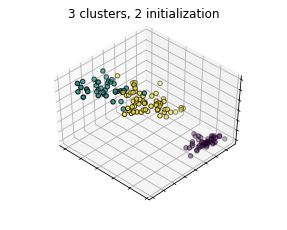

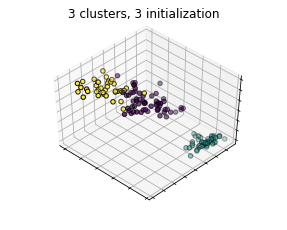

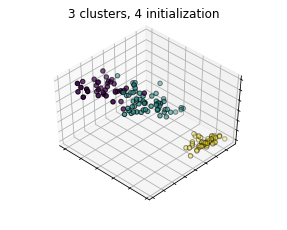

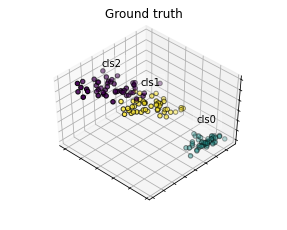

In [4]:
fignum = 1
titles= ['6 clusters', '3 clusters', '3 clusters, 1 initialization', '3 clusters, 2 initialization', '3 clusters, 3 initialization', '3 clusters, 4 initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4,3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_
    ax.scatter(X[:, 3], X[:, 0], X[:, 2], 
              c=labels.astype(np.float), edgecolor='k')
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_title(titles[fignum-1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4,3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('cls0', 0),
                   ('cls1', 1),
                   ('cls2', 2)]:
    ax.text3D(X[y == label, 3].mean(),
             X[y == label, 0].mean(),
             X[y == label, 2].mean() + 2, name,
             horizontalalignment='center',
             bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))

y = np.choose(y, [1,2,0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Ground truth')
ax.dist = 12